Dado que el entrenamiento de redes neuronales es una tarea  muy costosa, **se recomienda ejecutar el notebooks en [Google Colab](https://colab.research.google.com)**, por supuesto también se puede ejecutar en local.

Al entrar en [Google Colab](https://colab.research.google.com) bastará con hacer click en `upload` y subir este notebook. No olvide luego descargarlo en `File->Download .ipynb`

**El examen deberá ser entregado con las celdas ejecutadas, si alguna celda no está ejecutadas no se contará.**

El examen se divide en preguntas de código y preguntas teóricas, con la puntuación que se indica a continuación. La puntuación máxima será 10.

- [Actividad 1: Redes Densas](#actividad_1): 10 pts
    - Correcta normalización: máximo de 0.5 pts
    - [Cuestión 1](#1.1): 1.5 pts
    - [Cuestión 2](#1.2): 1.5 pts
    - [Cuestión 3](#1.3): 1.5 pts
    - [Cuestión 4](#1.4): 1 pts
    - [Cuestión 5](#1.5): 1 pts
    - [Cuestión 6](#1.6): 1 pts
    - [Cuestión 7](#1.7): 1 pts
    - [Cuestión 8](#1.8): 1 pts


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
!pip install scikit-learn # install scikit-learn if you haven't already
from sklearn.preprocessing import StandardScaler # import the StandardScaler class

<a name='actividad_1'></a>
# Actividad 1: Redes Densas

Para esta actividad vamos a utilizar el [wine quality dataset](https://archive.ics.uci.edu/ml/datasets/wine+quality). Con el que trataremos de predecir la calidad del vino.

La calidad del vino puede tomar valores decimales (por ejemplo 7.25), independientemente de que en el dataset de entrenamiento sean números enteros. Por lo tanto, el problema es una `regresión`.

**Puntuación**:

Normalizar las features correctamente (x_train, x_test): 0.5 pts

- Correcta normalización: máximo de 0.5 pts
- [Cuestión 1](#1.1): 1 pt
- [Cuestión 2](#1.2): 1 pt
- [Cuestión 3](#1.3): 0.5 pts
- [Cuestión 4](#1.4): 0.5 pts
- [Cuestión 5](#1.5): 0.5 pts
- [Cuestión 6](#1.6): 0.5 pts
- [Cuestión 7](#1.7): 0.5 pts
- [Cuestión 8](#1.8): 0.5 pts



In [ ]:
# Descargar los datos con pandas
df_red = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',
    sep=';'
)
df_white = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv',
    sep=';'
)
df = pd.concat([df_red, df_white])

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
feature_names = [
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
    'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'
]


# separar features y target
y = df.pop('quality').values
X = df.copy().values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print('x_train, y_train shapes:', x_train.shape, y_train.shape)
print('x_test, y_test shapes:', x_test.shape, y_test.shape)
print('Some qualities: ', y_train[:5])

x_train, y_train shapes: (4872, 11) (4872,)
x_test, y_test shapes: (1625, 11) (1625,)
Some qualities:  [6 7 8 5 6]


In [ ]:
## Si quiere, puede normalizar las features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Verificar los resultados
print('x_train (normalizado) shape:', x_train.shape)
print('x_test (normalizado) shape:', x_test.shape)

x_train (normalizado) shape: (4872, 11)
x_test (normalizado) shape: (1625, 11)


<a name='1.1'></a>
## Cuestión 1: Cree un modelo secuencial que contenga 4 capas ocultas(hidden layers), con más de 60 neuronas  por capa, sin regularización y obtenga los resultados.

Puntuación:
- Obtener el modelo correcto: 0.8 pts
- Compilar el modelo: 0.1pts
- Acertar con la función de pérdida: 0.1 pts

In [ ]:
print("Número de clases:", len(pd.unique(y_train)))
print("Clases:", pd.unique(y_train))

Número de clases: 7
Clases: [6 7 8 5 4 3 9]


In [ ]:

# Código aquí
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
# Definir el modelo
model = tf.keras.models.Sequential()

# Agregar las capas ocultas
model.add(layers.Dense(128, activation='relu', input_shape=(X.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
# Agregar la capa de salida
model.add(layers.Dense(1))
# Resumen del modelo
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,201 (200.00 KB)

 Trainable params: 51,201 (200.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compilación del modelo
# Código aquí
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])

In [ ]:
# No modifique el código
history = model.fit(x_train,
          y_train,
          epochs=200,
          batch_size=32,
          validation_split=0.2,
          verbose=1)

Epoch 1/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 8.8020 - mae: 2.2697 - val_loss: 1.5178 - val_mae: 0.8936
Epoch 2/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.0474 - mae: 0.7986 - val_loss: 0.7998 - val_mae: 0.6841
Epoch 3/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.6120 - mae: 0.6127 - val_loss: 0.6434 - val_mae: 0.6154
Epoch 4/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.5593 - mae: 0.5779 - val_loss: 0.5543 - val_mae: 0.5695
Epoch 5/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.4879 - mae: 0.5339 - val_loss: 0.5315 - val_mae: 0.5609
Epoch 6/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.4383 - mae: 0.5162 - val_loss: 0.5494 - val_mae: 0.5753
Epoch 7/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.4675 - mae: 0.5301 - val_loss: 0.5531 - val_mae: 0.5750
Epoch 8/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4847 - mae: 0.5485 - val_loss: 0.5347 - val_mae: 0.5644
Epoch 9/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 7

In [ ]:
# No modifique el código
results = model.evaluate(x_test, y_test, verbose=1)
print('Test Loss: {}'.format(results))

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5237 - mae: 0.5129
Test Loss: [0.5423479676246643, 0.517159640789032]


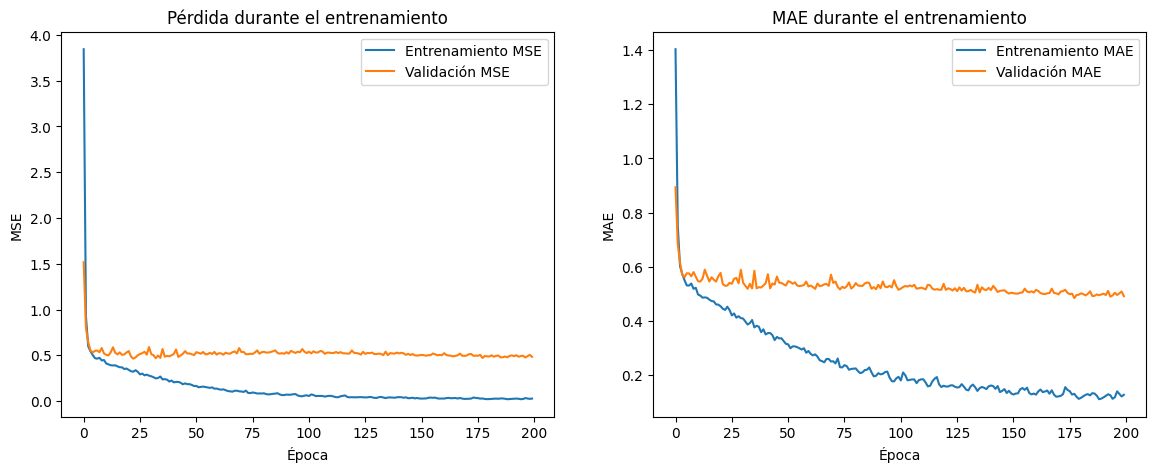

In [ ]:
# Graficar el historial de entrenamiento
plt.figure(figsize=(14, 5))

# Pérdida (MSE)
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Entrenamiento MSE')
plt.plot(history.history['val_loss'], label='Validación MSE')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('MSE')
plt.legend()

# Error Absoluto Medio (MAE)
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Entrenamiento MAE')
plt.plot(history.history['val_mae'], label='Validación MAE')
plt.title('MAE durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('MAE')
plt.legend()

plt.show()


In [ ]:
# Realizar predicciones
y_pred = model.predict(x_test)

# Comparar algunos valores reales y predichos
comparison = pd.DataFrame({'Real': y_test, 'Predicho': y_pred.flatten()})
print(comparison.head(10))


51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
   Real  Predicho
0     6  5.556571
1     6  5.969975
2     6  6.292793
3     5  4.599954
4     8  5.771601
5     5  5.491233
6     6  5.860612
7     6  6.425816
8     6  6.316129
9     6  6.022064


<a name='1.2'></a>
## Cuestión 2: Utilice el mismo modelo de la cuestión anterior pero añadiendo al menos dos técnicas distinas de regularización. No es necesario reducir el test loss.

Ejemplos de regularización: [Prevent_Overfitting.ipynb](https://github.com/ezponda/intro_deep_learning/blob/main/class/Fundamentals/Prevent_Overfitting.ipynb)

In [ ]:
model = tf.keras.models.Sequential()
# Código aquí
# Agregar las capas ocultas con regularización L2 y Dropout
model.add(layers.Dense(128, activation='relu', input_shape=(X.shape[1],),
                       kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(128, activation='relu',
                       kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(128, activation='relu',
                       kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(128, activation='relu',
                       kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dropout(0.5))

# Agregar la capa de salida
model.add(layers.Dense(1))

# Resumen del modelo
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,201 (200.00 KB)

 Trainable params: 51,201 (200.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compilación del modelo
# Código aquí
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])



In [ ]:
batch_size=32

In [ ]:
# No modifique el código
history = model.fit(x_train,
          y_train,
          epochs=200,
          batch_size=batch_size,
          validation_split=0.2,
          verbose=1)

Epoch 1/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 15.2278 - mae: 2.7580 - val_loss: 8.1219 - val_mae: 1.9225
Epoch 2/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.2723 - mae: 1.5214 - val_loss: 6.9525 - val_mae: 1.7472
Epoch 3/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.6751 - mae: 1.2526 - val_loss: 4.9993 - val_mae: 1.2456
Epoch 4/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.7923 - mae: 1.1069 - val_loss: 3.9845 - val_mae: 0.9604
Epoch 5/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.1331 - mae: 0.9937 - val_loss: 3.6812 - val_mae: 0.9555
Epoch 6/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.6469 - mae: 0.9212 - val_loss: 2.7655 - val_mae: 0.6542
Epoch 7/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.2818 - mae: 0.8880 - val_loss: 2.5899 - val_mae: 0.6838
Epoch 8/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.9629 - mae: 0.8521 - val_loss: 2.3374 - val_mae: 0.6614
Epoch 9/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms

In [ ]:
# No modifique el código
results = model.evaluate(x_test, y_test, verbose=1)
print('Test Loss: {}'.format(results))

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5705
Test Loss: 0.5901877284049988


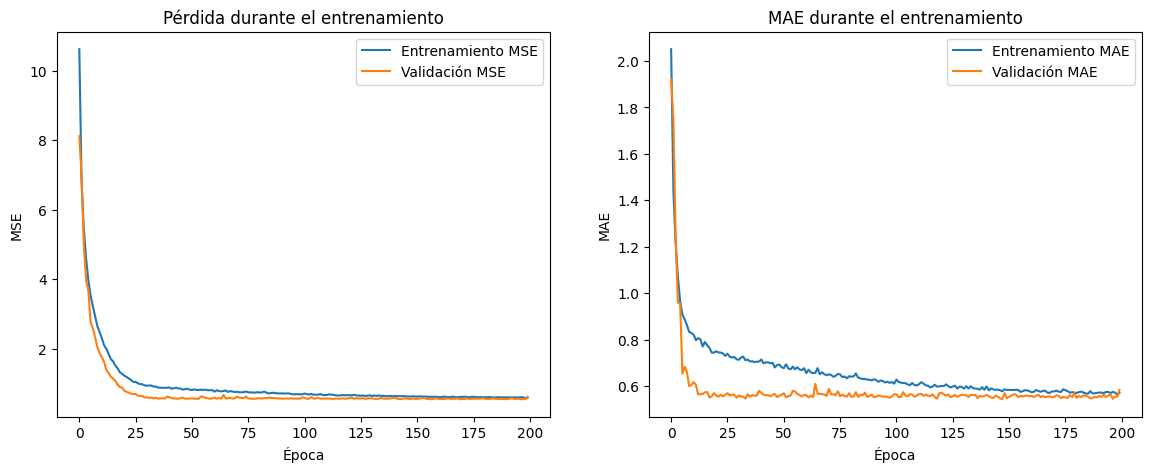

In [ ]:
# Graficar el historial de entrenamiento
plt.figure(figsize=(14, 5))

# Pérdida (MSE)
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Entrenamiento MSE')
plt.plot(history.history['val_loss'], label='Validación MSE')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('MSE')
plt.legend()

# Error Absoluto Medio (MAE)
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Entrenamiento MAE')
plt.plot(history.history['val_mae'], label='Validación MAE')
plt.title('MAE durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('MAE')
plt.legend()

plt.show()

<a name='1.3'></a>
## Cuestión 3: Utilice el mismo modelo de la cuestión anterior pero añadiendo un callback de early stopping. No es necesario reducir el test loss.

In [ ]:
model = tf.keras.models.Sequential()
# Código aquí: Agregar las capas ocultas con regularización
model.add(layers.Dense(128, activation='relu', input_shape=(x_train.shape[1],),
                       kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu',
                       kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu',
                       kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu',
                       kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dropout(0.5))

# Agregar la capa de salida
model.add(layers.Dense(1))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compilación del modelo
# Código aquí
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [ ]:
## definir el early stopping callback
# Código aquí
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

history_1 = model.fit(
    x_train, y_train,
    epochs=200,
    batch_size=32,
    validation_split=0.2,
    verbose=1,
    callbacks=[early_stopping]  # Utilizar Early Stopping para evitar sobreajuste
)

Epoch 1/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 16.5837 - mae: 2.9481 - val_loss: 8.7322 - val_mae: 2.0593
Epoch 2/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.3246 - mae: 1.5299 - val_loss: 7.6970 - val_mae: 1.9529
Epoch 3/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.7715 - mae: 1.2696 - val_loss: 5.4966 - val_mae: 1.4267
Epoch 4/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.8866 - mae: 1.1271 - val_loss: 4.1434 - val_mae: 1.0499
Epoch 5/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.1233 - mae: 0.9868 - val_loss: 3.4700 - val_mae: 0.8591
Epoch 6/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.6665 - mae: 0.9389 - val_loss: 2.8495 - val_mae: 0.6849
Epoch 7/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.2665 - mae: 0.8855 - val_loss: 2.5989 - val_mae: 0.6811
Epoch 8/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.0148 - mae: 0.8780 - val_loss: 2.3440 - val_mae: 0.6551
Epoch 9/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms

In [ ]:
# No modifique el código
results = model.evaluate(x_test, y_test, verbose=1)
print('Test Loss: {}'.format(results))

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5731 - mae: 0.5647
Test Loss: [0.5908705592155457, 0.5732591152191162]


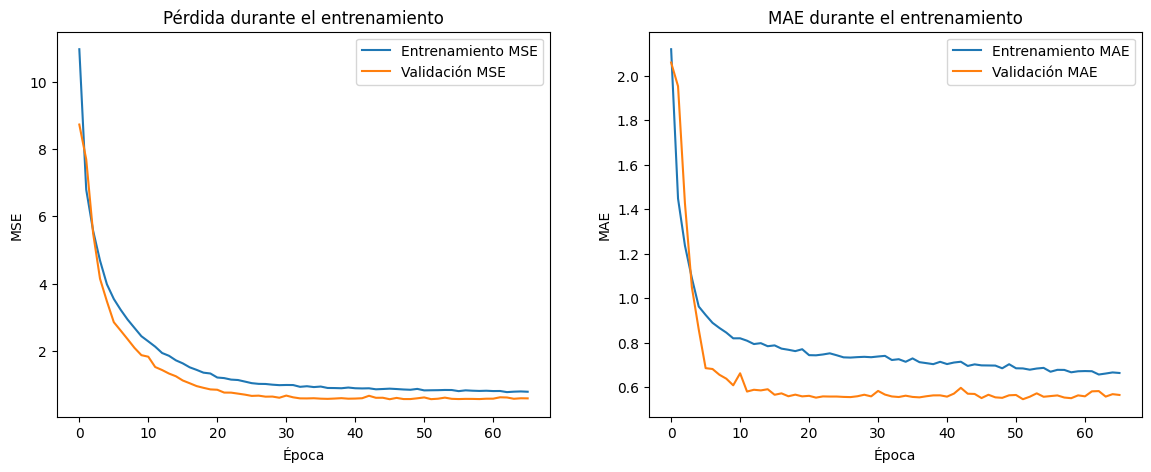

In [ ]:
# Graficar el historial de entrenamiento
plt.figure(figsize=(14, 5))

# Pérdida (MSE)
plt.subplot(1, 2, 1)
plt.plot(history_1.history['loss'], label='Entrenamiento MSE')
plt.plot(history_1.history['val_loss'], label='Validación MSE')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('MSE')
plt.legend()

# Error Absoluto Medio (MAE)
plt.subplot(1, 2, 2)
plt.plot(history_1.history['mae'], label='Entrenamiento MAE')
plt.plot(history_1.history['val_mae'], label='Validación MAE')
plt.title('MAE durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('MAE')
plt.legend()

plt.show()

<a name='1.4'></a>
## Cuestión 4: ¿Podría haberse usado otra función de activación de la neurona de salida? En caso afirmativo especifíquela.


Sí, podría haber usado otra función de activación en la neurona de salida. Por ejemplo, la función de activación lineal es apropiada para problemas de regresión:
```
# Esto tiene formato de código
model.add(layers.Dense(1, activation=None))

